In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
things = []
stuff = os.listdir('.')
for i in range(0,len(stuff)):
    if '.' not in stuff[i]:
        things.append(stuff[i])

In [3]:
losses = os.listdir('loss')
accuracies = os.listdir('accuracy')    

In [4]:
min_loss = []
min_loss_idx = []
min_err = []
min_err_idx = []
combined_loss = []
combined_acc = []
for i in range(0,len(losses)):
    val = pd.read_csv('loss/'+losses[i])
    acc = pd.read_csv('accuracy/'+accuracies[i])
#    print('epochs {}, value {}'.format(losses[i].split('numepochs=')[1].split('-tag')[0],min(val['Value'])))
    print('epochs {}, best epoch {}, loss value {}'.format(losses[i].split('numepochs=')[1].split('-tag')[0], np.argmin(val['Value']),min(val['Value'])))
    print('epochs {}, best epoch {}, err value {}'.format(accuracies[i].split('numepochs=')[1].split('-tag')[0], np.argmax(acc['Value']),1-max(acc['Value'])/100))
#     min_loss.append(min(val['Value']))
#     min_loss_idx.append(int(losses[i].split('numepochs=')[1].split('-tag')[0]))
    #combined_loss.append((int(losses[i].split('numepochs=')[1].split('-tag')[0]),min(val['Value'])))
    combined_loss.append((np.argmin(val['Value']),min(val['Value'])))
    combined_acc.append((np.argmax(acc['Value']),(100-max(acc['Value']))/100))
    #combined_acc.append((int(accuracies[i].split('numepochs=')[1].split('-tag')[0]),min(val['Value'])))

epochs 120, best epoch 102, loss value 0.955316722393036
epochs 120, best epoch 102, err value 0.23537994384765626
epochs 15, best epoch 14, loss value 1.3510347604751587
epochs 15, best epoch 13, err value 0.33343994140625
epochs 150, best epoch 129, loss value 0.942396879196167
epochs 150, best epoch 121, err value 0.23463996887207028
epochs 180, best epoch 140, loss value 0.9465397000312804
epochs 180, best epoch 149, err value 0.23498031616210935
epochs 210, best epoch 152, loss value 0.9441246986389159
epochs 210, best epoch 158, err value 0.23313995361328121
epochs 270, best epoch 204, loss value 0.937919020652771
epochs 270, best epoch 206, err value 0.23133987426757807
epochs 30, best epoch 29, loss value 1.122058391571045
epochs 30, best epoch 29, err value 0.27940002441406253
epochs 300, best epoch 210, loss value 0.9315931797027588
epochs 300, best epoch 224, err value 0.22805984497070309
epochs 45, best epoch 44, loss value 1.0521821975708008
epochs 45, best epoch 43, err v

In [5]:
combined_loss.sort(key=lambda x:x[0])
combined_acc.sort(key=lambda x:x[0])

In [8]:
for i in range(0,len(combined_loss)):
    min_loss.append(combined_loss[i][1])
    min_loss_idx.append(combined_loss[i][0])
    min_err.append(combined_acc[i][1])
    min_err_idx.append(combined_acc[i][0])

In [9]:
import scipy
from scipy import optimize
vals = scipy.optimize.curve_fit(lambda t,a,b,c: a+b*np.exp(c*t),  min_loss_idx,  min_loss, p0=(0.9,0.1,-0.1), maxfev=10000)

In [10]:
vals[0]

array([ 0.94324506,  0.76131766, -0.04584862])

In [11]:
min_loss_exp = []
for i in range(0,len(min_loss_idx)):
    min_loss_exp.append(vals[0][0]+vals[0][1]*np.exp(vals[0][2]*min_loss_idx[i]))

In [12]:
min_err

[0.33343994140625,
 0.2794000244140625,
 0.2624800109863281,
 0.2528999328613281,
 0.24248001098632813,
 0.23537994384765626,
 0.2346399688720703,
 0.23498031616210938,
 0.23313995361328124,
 0.23133987426757813,
 0.2280598449707031]

In [13]:
valsnew = scipy.optimize.curve_fit(lambda t,a,b,c: a+b*np.exp(c*t),  min_err_idx,  min_err, p0=(0.2,0.1,-0.1), maxfev=10000)

In [14]:
valsnew

(array([ 0.2329546 ,  0.16744293, -0.04066735]),
 array([[ 2.04110504e-06,  2.59118537e-06, -2.42857616e-06],
        [ 2.59118537e-06,  9.50041069e-05, -2.44814691e-05],
        [-2.42857616e-06, -2.44814691e-05,  9.57355352e-06]]))

In [15]:
min_err_exp = []
for i in range(0,len(min_loss_idx)):
    min_err_exp.append(valsnew[0][0]+valsnew[0][1]*np.exp(valsnew[0][2]*min_err_idx[i]))

In [16]:
min_loss_exp

[1.3439278393825833,
 1.1446748263151378,
 1.0445070887651182,
 0.9941511343359957,
 0.9626817278677706,
 0.9503336900630199,
 0.9453006865535648,
 0.9444864690802384,
 0.9439611609658488,
 0.9433110659487103,
 0.943295192587824]

In [19]:
names = ['Real Data','Exponential Fit']
name_data = [min_loss,min_loss_exp]
name_err = [min_err,min_err_exp]
name_axes = [min_loss_idx,min_err_idx]

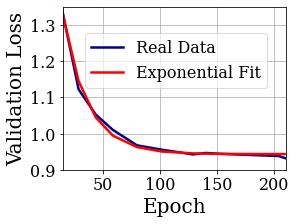

In [20]:
f = []
# import seaborn as seaborn
from matplotlib import rc

font = {
    'family': "serif",
    'weight': "normal",
    'size' : 24
}
rc('font', **font)

# color_palette = seaborn.color_palette(palette=None, n_colors=len(nuulist), desat=None)
for i in range(0,len(names)):
    f.append(names[i])

# style = {}
# for i in range(0,len(nuulist)):
#     style[f[i]] = {'c': color_palette[i], 'linestyle': '-.'}

style = {
    f[0]: {'c': 'darkblue', 'linestyle': "-", 'linewidth': 2.5},
    f[1]: {'c': 'red', 'linestyle': '-', 'linewidth':2.5},
#     f[2]: {'c': 'blue','linestyle': '-',},
#     f[3]: {'c': 'blue','linestyle': '-.','alpha':0.4},
#     f[4]: {'c': 'purple', 'linestyle': '-'},
#     f[5]: {'c': 'purple', 'linestyle': '-.'},
#    f[6]: {'c': 'black', 'linestyle': '-.'},
}

# plt.title('Test Accuracy', fontsize=22)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize=[4, 3])
#axins = zoomed_inset_axes(ax, 3, loc=1) # zoom = 6


handleacc = list(range(len(names)))
for i in range(len(names)):
    ax.plot(min_loss_idx,name_data[i], label=f[i], **style[f[i]])[0]
#     axins.plot(newlists[i],1 - np.array(trainacc[i]) / 100, **style[f[i]])
ax.legend( prop={'size': 16}, loc=[0.1,0.5], framealpha=0.7)


ax.set_xlabel('Epoch', fontsize=20)
ax.set_ylabel('Validation Loss', fontsize=20)
ax.set_yscale('linear')
ax.set_ylim([0.9,1.35])
ax.set_xlim([15, 210])
    #plt.xscale('symlog')
ax.set_xscale('linear')
ax.tick_params(labelsize=16)
ax.grid()
# axins.grid()
# axins.tick_params(labelsize=14)
# axins.set_xlim(87, 89)
# axins.set_ylim(0.0, 0.17)

# mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.0")

plt.savefig('Res50_loss.pdf', bbox_inches='tight')
plt.show()
# plt.close()

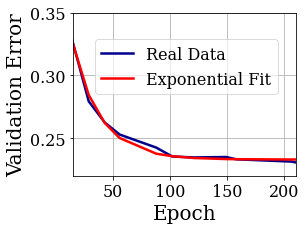

In [21]:
f = []
# import seaborn as seaborn
from matplotlib import rc

font = {
    'family': "serif",
    'weight': "normal",
    'size' : 24
}
rc('font', **font)

# color_palette = seaborn.color_palette(palette=None, n_colors=len(nuulist), desat=None)
for i in range(0,len(names)):
    f.append(names[i])

# style = {}
# for i in range(0,len(nuulist)):
#     style[f[i]] = {'c': color_palette[i], 'linestyle': '-.'}

style = {
    f[0]: {'c': 'darkblue', 'linestyle': "-", 'linewidth': 2.5},
    f[1]: {'c': 'red', 'linestyle': '-', 'linewidth':2.5},
#     f[2]: {'c': 'blue','linestyle': '-',},
#     f[3]: {'c': 'blue','linestyle': '-.','alpha':0.4},
#     f[4]: {'c': 'purple', 'linestyle': '-'},
#     f[5]: {'c': 'purple', 'linestyle': '-.'},
#    f[6]: {'c': 'black', 'linestyle': '-.'},
}

# plt.title('Test Accuracy', fontsize=22)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots(figsize=[4, 3])
#axins = zoomed_inset_axes(ax, 3, loc=1) # zoom = 6


handleacc = list(range(len(names)))
for i in range(len(names)):
    ax.plot(min_err_idx,name_err[i], label=f[i], **style[f[i]])[0]
#     axins.plot(newlists[i],1 - np.array(trainacc[i]) / 100, **style[f[i]])
ax.legend( prop={'size': 16}, loc=[0.1,0.5], framealpha=0.7)


ax.set_xlabel('Epoch', fontsize=20)
ax.set_ylabel('Validation Error', fontsize=20)
ax.set_yscale('linear')
ax.set_ylim([0.22,0.35])
ax.set_xlim([15, 210])
    #plt.xscale('symlog')
ax.set_xscale('linear')
ax.tick_params(labelsize=16)
ax.grid()
# axins.grid()
# axins.tick_params(labelsize=14)
# axins.set_xlim(87, 89)
# axins.set_ylim(0.0, 0.17)

# mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.0")

plt.savefig('Res50_err.pdf', bbox_inches='tight')
plt.show()
# plt.close()